In [1]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large 
Z_{n+1} = Z_{n}^{2*Z_{n}^{-p_{(n)}^{Z_{n}^{p_{(n+1)}}}}}
\end{eqnarray}""")

<IPython.core.display.Latex object>

# Clownscape

    Sequential iteration (on the complex plane) of difference equation:
        for k = 1, 2,... , (number of parameters - 1)
        Zn = Z**(2*Z**(-(p[k])**(Z**(-p[k+1]))))
    where p = 
    [0.56890021, -0.25564542, -0.37746896, -0.29588711, -1.47513451, -0.23400405, 0.11844484]
    produces a chaotic screenscape.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [3]:
def ItchicuPpwrF(Z, p, Z0=None, ET=None, Zm1=0, Zm2=0):
    """
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    for n in range(0, len(p) - 1):
        try:
            Zn = Z**(2*Z**(-(p[n])**(Z**(-p[n+1]))))
        except:
            return Z
            pass
        
        if np.isfinite(Zn):
            Z = Zn
        else:
            return Z
        
    return Z

In [26]:
#                                        -- Iterate the equation on every point of the complex grid --
par_set = {'n_rows': 400, 'n_cols': 800}
par_set['center_point'] = 0.6 - 0.6j
par_set['theta'] = np.pi/6
par_set['zoom'] = 0.16

par_set['it_max'] = 12
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
par_set['delete_temp_dir'] = True

p = [0.56890021, -0.25564542, -0.37746896, -0.29588711, -1.47513451, -0.23400405, 0.11844484]
list_tuple = [(ItchicuPpwrF, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

13.206270933151245 	 total time
converstion time =	 0.7645540237426758


coloring time =	 1.6971921920776367


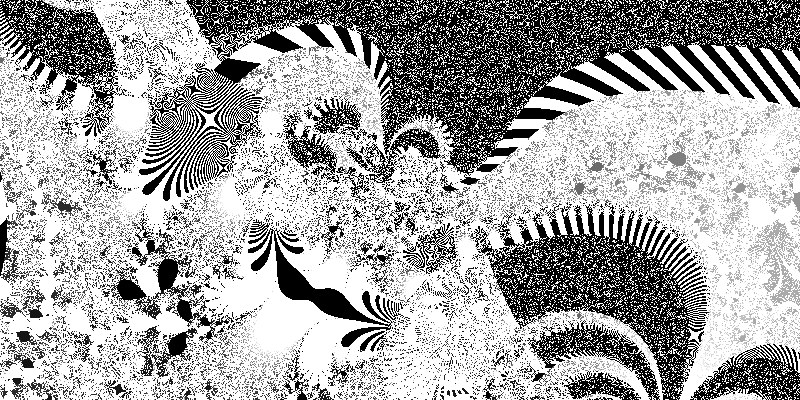

In [27]:
#                  Escape Time: darker escaped sooner
t0 = time.time()
ETd = ncp.mat_to_gray(ETn)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time =	 1.8263108730316162


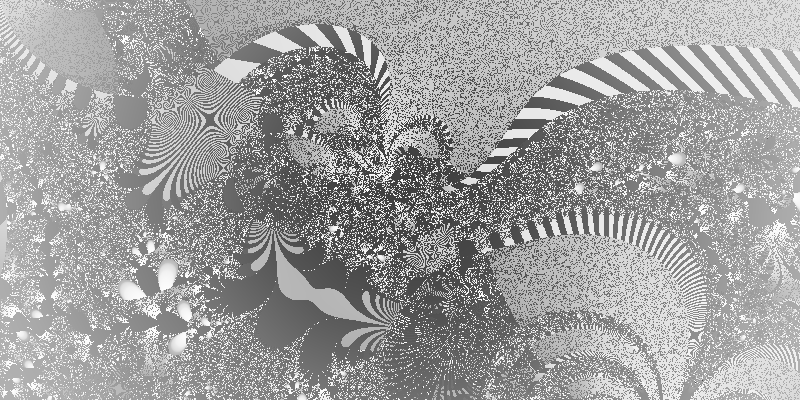

In [28]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 1.791727066040039


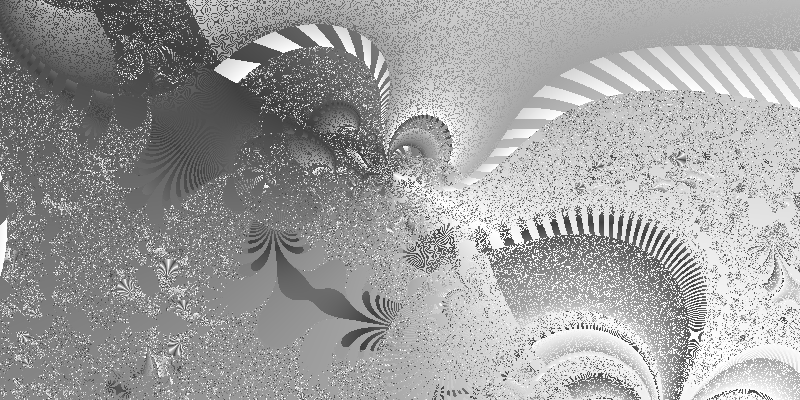

In [29]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(Zr, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(R)

coloring time:	 4.140563011169434


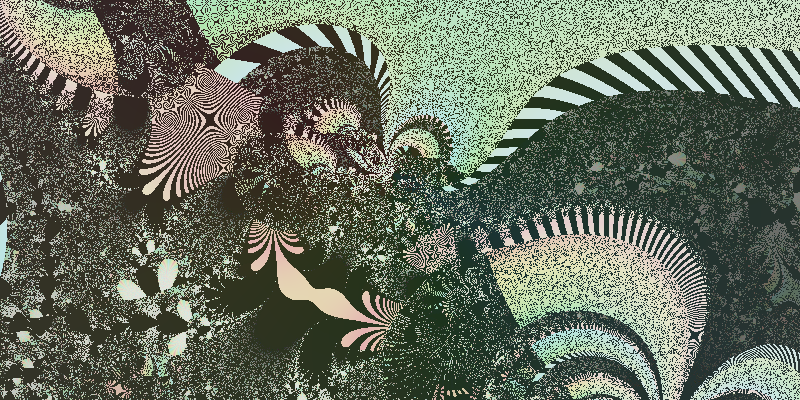

In [30]:
#                  Rotation > Hue, Distance > Saturation, Escape Time > Value (intensity-brightness) (muted)
H = Zr
S = 1 - Zd
V = 1 - ETn

Hue_width = 0.5
H_min = 0.0
H_max = H_min + Hue_width

S_max = 0.5
S_min = 0.05

V_max = 0.9
V_min = 0.2
t0 = time.time()
Ihsv = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 4.032779932022095


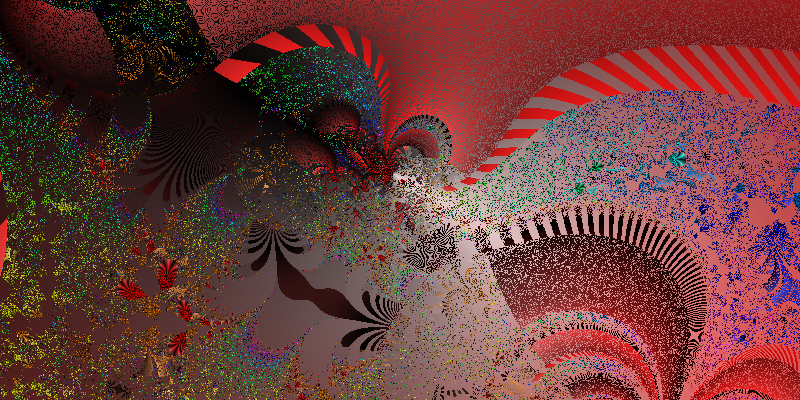

In [36]:
#                  Rotation > Hue, Escape Time > Saturation, Distance > Value (no significantly muted)
H = ETn
S = Zd
V = Zr

Hue_width = 1.0
H_min = 0.0
H_max = H_min+Hue_width

S_max = 1.0
S_min = 0.1

V_max = 0.9
V_min = 0.0
t0 = time.time()
I = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(I)

In [37]:
#                                        smaller -> view individual escape time sets
par_set = {'n_rows': 200, 'n_cols': 400}
par_set['center_point'] = 0.6 - 0.6j
par_set['theta'] = np.pi/6
par_set['zoom'] = 0.16

par_set['it_max'] = 12
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()
par_set['delete_temp_dir'] = True

p = [0.56890021, -0.25564542, -0.37746896, -0.29588711, -1.47513451, -0.23400405, 0.11844484]
list_tuple = [(ItchicuPpwrF, (p))]

t0 = time.time()
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

3.360342025756836 	 total time


ET =	 1


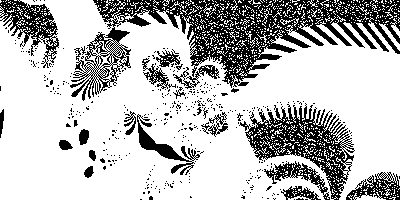

ET =	 2


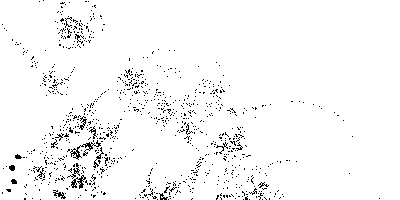

ET =	 3


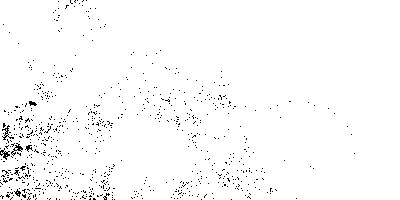

ET =	 4


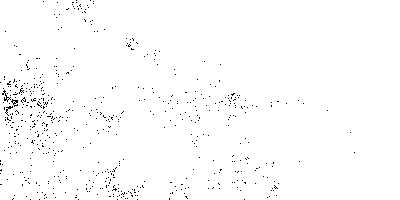

ET =	 5


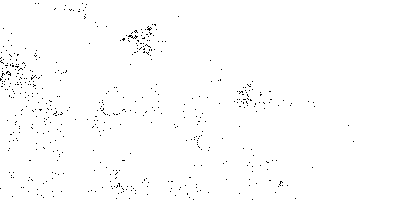

ET =	 6


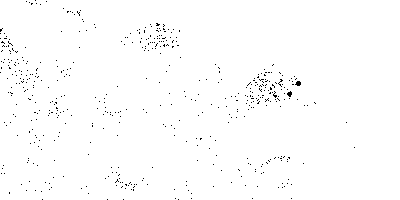

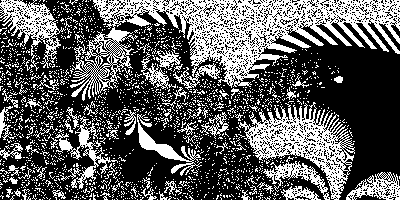

In [38]:
#                                        view smaller - individual escape time starting points
for t in range(1,7):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > 7] = 0
display(ncp.mat_to_gray(I))

In [39]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
total_number_of_points = par_set['n_rows'] * par_set['n_cols']
print('\nHow many never escaped:\t',(ET_sm > k).sum(),'of',total_number_of_points)

0 0
1 21610
2 2633
3 1507
4 911
5 714
6 727
7 740
8 1062
9 1435
10 588
11 340
12 255

How many never escaped:	 47478 of 80000


In [40]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  13.43 -173.9 degrees

    47478 total unescaped points

   points near V       (plane units)
    47314 within V/ 1  (13.427)
    22459 within V/ 2  (6.714)
    10062 within V/ 3  (4.476)
     5822 within V/ 4  (3.357)
     3564 within V/ 5  (2.685)
     2229 within V/ 6  (2.238)
     1483 within V/ 7  (1.918)
     1043 within V/ 8  (1.678)
      758 within V/ 9  (1.492)
      600 within V/10  (1.343)
      481 within V/11  (1.221)
